# GENDER RECOGNITION USING VOICE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("audio5.csv")
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,dfrange,mindom,maxdom,output
0,-435.518104,-14.620664,26.291158,-35.330138,32.198779,-19.672872,19.024791,1.389957,-1.840159,5.305392,1
1,-425.413774,-27.132784,23.801116,-24.352400,43.290223,-27.057916,10.768924,-5.747193,-2.709395,10.212588,1
2,-440.046894,-20.441864,13.042723,-28.913105,40.113267,-28.731411,26.792018,-12.850958,11.963227,2.924920,1
3,-441.625644,8.953386,-38.356555,27.882992,-19.975115,-9.692923,25.333289,-26.885805,27.429454,-9.028330,1
4,-523.744454,4.522076,2.511129,-23.604555,-17.244445,-1.333516,-4.301496,-10.878918,-7.656379,-3.638945,1
...,...,...,...,...,...,...,...,...,...,...,...
320,-567.003354,9.923576,39.653032,-8.763944,27.551377,-7.231746,22.580218,-3.617488,3.395378,-11.603743,1
321,-599.317133,249.611528,-35.370873,49.660435,-18.029281,-11.719705,-26.970604,-12.523024,-18.430019,-14.851566,0
322,-607.864313,255.857138,-42.687953,44.673666,-8.861902,-16.238434,-34.540311,-11.209151,-18.180950,-13.866061,0
323,-622.699264,276.391438,-73.092419,65.443035,-32.461500,-5.997318,-41.989538,-14.659037,-23.576341,-5.343783,0


In [3]:
data.shape

(325, 11)

In [4]:
count_of_ones = data['output'].value_counts().get(1, 0)
print(f"Number of occurrences of 1 in 'output_label': {count_of_ones}")
count_of_zeros = data['output'].value_counts().get(0, 0)
print(f"Number of occurrences of 0 in 'output_label': {count_of_zeros}")

Number of occurrences of 1 in 'output_label': 163
Number of occurrences of 0 in 'output_label': 162


In [5]:
#Separating input data as X and output as y
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
# X,y

In [6]:
#splitting training and test dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
# X_train,X_test,y_train,y_test

## Logistic Regression

In [7]:
lcv=LogisticRegressionCV()
lcv.fit(X_train,y_train)
lcv_pred=lcv.predict(X_test)
y1=lcv_pred
acc_log=accuracy_score(y_test,lcv_pred)
print("Accuracy: ",acc_log)

C:\Users\HARIPRIYA\Documents\JUPITER\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HARIPRIYA\Documents\JUPITER\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

C:\Users\HARIPRIYA\Documents\JUPITER\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HARIPRIYA\Documents\JUPITER\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Accuracy:  0.9230769230769231


In [8]:
f1_score_log = f1_score(y_test, lcv_pred)
print("F1 Score:",f1_score_log)

F1 Score: 0.923076923076923


In [9]:
r2_score_log = r2_score(y_test, lcv_pred)
print("r2 Score:",r2_score_log)

r2 Score: 0.6922348484848485


In [10]:
mse_log = mean_squared_error(y_test, lcv_pred)
print("Mean Squared Error:",mse_log)

Mean Squared Error: 0.07692307692307693


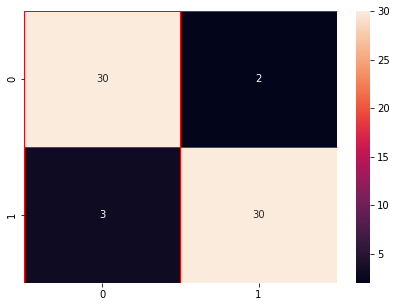

<Figure size 432x288 with 0 Axes>

In [11]:
cm = confusion_matrix(y_test, lcv_pred)
f,ax = plt.subplots(figsize=(7, 5))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

## SVC

In [12]:
svc=SVC()
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
y1=svc_pred
acc_svc=accuracy_score(y_test,lcv_pred)
print("Accuracy: ",acc_svc)

Accuracy:  0.9230769230769231


In [13]:
from sklearn.metrics import f1_score
f1_score_svc =f1_score(y_test, svc_pred)
print("F1 Score:",f1_score_svc)

F1 Score: 0.923076923076923


In [14]:
from sklearn.metrics import r2_score
r2_score_svc =r2_score(y_test, svc_pred)
print("r2 Score:",r2_score_svc)

r2 Score: 0.6922348484848485


In [15]:
from sklearn.metrics import mean_squared_error
mse_svc =mean_squared_error(y_test, svc_pred)
print("Mean Squared Error:",mse_svc)

Mean Squared Error: 0.07692307692307693


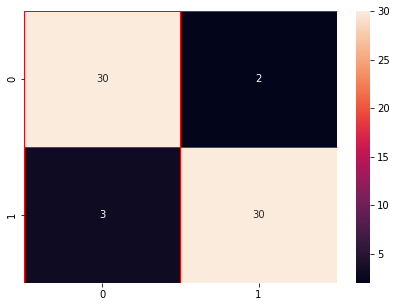

<Figure size 432x288 with 0 Axes>

In [16]:
cm = confusion_matrix(y_test, svc_pred)
f,ax = plt.subplots(figsize=(7, 5))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
y1=rfc_pred
acc_rfc=accuracy_score(y_test,lcv_pred)
print("Accuracy: ",acc_rfc)

Accuracy:  0.9230769230769231


In [18]:
from sklearn.metrics import f1_score
f1_score_rfc=f1_score(y_test,rfc_pred)
print("F1 Score: ",f1_score_rfc)

F1 Score:  0.8955223880597014


In [19]:
from sklearn.metrics import r2_score
r2_score_rfc=r2_score(y_test,rfc_pred)
print("r2 Score: ",r2_score_rfc)

r2 Score:  0.569128787878788


In [20]:
from sklearn.metrics import mean_squared_error
mse_rfc=mean_squared_error(y_test,rfc_pred)
print("Mean Squared Error: ",mse_rfc)

Mean Squared Error:  0.1076923076923077


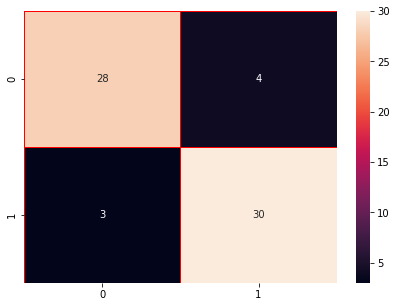

<Figure size 432x288 with 0 Axes>

In [21]:
cm = confusion_matrix(y_test, rfc_pred)
f,ax = plt.subplots(figsize=(7, 5))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred=dtc.predict(X_test)
y1=dtc_pred
acc_dtc=accuracy_score(y_test,dtc_pred)
print("Accuracy: ",acc_dtc)

Accuracy:  0.8615384615384616


In [23]:
from sklearn.metrics import f1_score
f1_score_dtc=f1_score(y_test,dtc_pred)
print("F1 Score: ",f1_score_dtc)

F1 Score:  0.8615384615384615


In [24]:
from sklearn.metrics import r2_score
r2_score_dtc=r2_score(y_test,dtc_pred)
print("r2 Score: ",r2_score_dtc)

r2 Score:  0.4460227272727274


In [25]:
from sklearn.metrics import mean_squared_error
mse_dtc=mean_squared_error(y_test,dtc_pred)
print("Mean Squared Error: ",mse_dtc)

Mean Squared Error:  0.13846153846153847


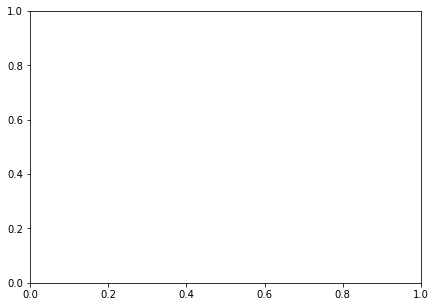

<Figure size 432x288 with 0 Axes>

In [26]:
cm = confusion_matrix(y_test, dtc_pred)
f,ax = plt.subplots(figsize=(7, 5))
# sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

## Comparison of Accuracy Scores of four classifiers

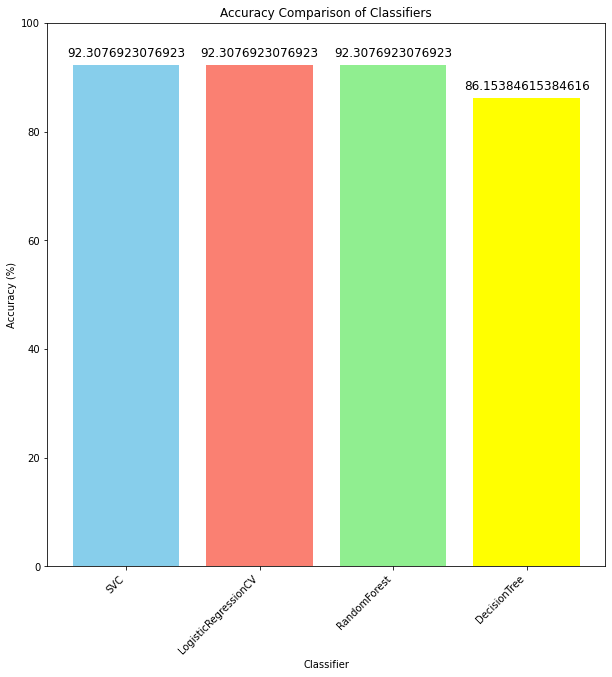

,Classifier,Accuracy
0,SVC,92.307692
1,LogisticRegressionCV,92.307692
3,RandomForest,92.307692
2,DecisionTree,86.153846


In [27]:
accuracy_results = {
    'SVC': acc_svc*100,
    'LogisticRegressionCV': acc_log*100,
    'DecisionTree': acc_dtc*100,
    'RandomForest': acc_rfc*100
}

results_df = pd.DataFrame(list(accuracy_results.items()), columns=['Classifier', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

colors = ['skyblue', 'salmon', 'lightgreen', 'yellow']

plt.figure(figsize=(10, 10))
plt.bar(results_df['Classifier'], results_df['Accuracy'], color=colors)
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Classifiers')
plt.ylim(0, 100) 
plt.xticks(rotation=45, ha='right')  

for i, v in enumerate(results_df['Accuracy']):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

results_df


C:\Users\HARIPRIYA\Documents\JUPITER\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HARIPRIYA\Documents\JUPITER\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

C:\Users\HARIPRIYA\Documents\JUPITER\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HARIPRIYA\Documents\JUPITER\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

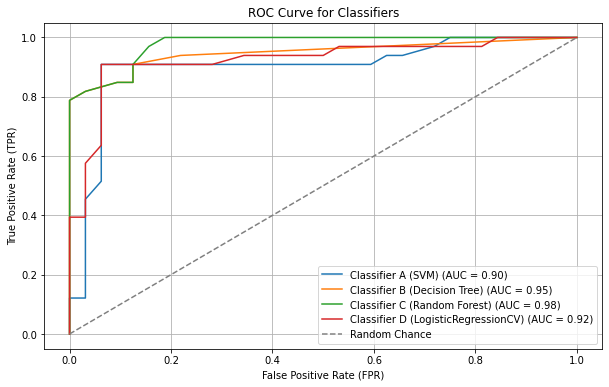

In [28]:
from sklearn.metrics import roc_curve, auc
classifiers = {
    'Classifier A (SVM)': SVC(probability=True),
    'Classifier B (Decision Tree)': DecisionTreeClassifier(),
    'Classifier C (Random Forest)': RandomForestClassifier(),
    'Classifier D (LogisticRegressionCV)': LogisticRegressionCV()
}

plt.figure(figsize=(10, 6))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Custom Data Input

In [29]:
import tkinter as tk
from tkinter import filedialog
import librosa
import librosa.display
import sounddevice as sd
import wave

In [30]:
def extract_features(audio_data, sample_rate):
    mfcc = np.mean(librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=10).T, axis=0)
    return mfcc

In [31]:
def classify_gender(val):
    if(val==1.0):
        return "male"
    else:
        return "female"  

In [32]:
# f_means=X.mean()
# f_means=np.array(f_means)

In [33]:
def process_live_audio():
    duration = 5  
    sample_rate = 44100  

    audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype=np.float32)
    sd.wait()

    voice_features = extract_features(audio_data.flatten(), sample_rate)
    voice_df = pd.DataFrame(voice_features)
    voice_array = np.array(voice_df)
#     res_df = voice_array + f_means 
#     print(voice_array)
    rfc_prediction = rfc.predict(voice_array.T)
    gender_label_rfc = classify_gender(rfc_prediction)
    result_label.config(text=f"Gender: {gender_label_rfc}")
    
    save_path = filedialog.asksaveasfilename(defaultextension=".wav", filetypes=[("WAV files", "*.wav")])
    if save_path:
        with wave.open(save_path, 'wb') as wf:
            wf.setnchannels(1)
            wf.setsampwidth(2)
            wf.setframerate(sample_rate)
            wf.writeframes((audio_data * 32767).astype(np.int16).tobytes())
    status_label.config(text=f"Recording saved to: {save_path}")

In [34]:
app = tk.Tk()
app.title("Gender Classification")
app.geometry("800x600")
app.configure(bg="black")

heading_label = tk.Label(app, text="Gender Recognition using Voice", font=("Helvetica", 30, "bold"), bg="#E0FFFF")
heading_label.pack(pady=10)

record_button = tk.Button(app, text="Record Live Audio",font=("Helvetica", 25, "bold"),bg="red", command=process_live_audio)
record_button.pack(pady=20)

result_label = tk.Label(app, text="Gender: ",font=("Helvetica", 25, "bold"))
result_label.pack(pady=20)

status_label = tk.Label(app, text="")
status_label.pack()

app.mainloop()


C:\Users\HARIPRIYA\Documents\JUPITER\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
